# LAX AQI Data cleaning and preprocessing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Read in the six years of data

In [5]:
aqi_2015 = pd.read_csv('../datasets/air-quality-reports/2015/daily_aqi_by_county_2015.csv')
aqi_2016 = pd.read_csv('../datasets/air-quality-reports/2016/daily_aqi_by_county_2016.csv')
aqi_2017 = pd.read_csv('../datasets/air-quality-reports/2017/daily_aqi_by_county_2017.csv')
aqi_2018 = pd.read_csv('../datasets/air-quality-reports/2018/daily_aqi_by_county_2018.csv')
aqi_2019 = pd.read_csv('../datasets/air-quality-reports/2019/daily_aqi_by_county_2019.csv')
aqi_2020 = pd.read_csv('../datasets/air-quality-reports/2020/daily_aqi_by_county_2020.csv')

### Convert date column to datetime

In [3]:
aqi_2015['Date'] = pd.to_datetime(aqi_2015['Date'])
aqi_2016['Date'] = pd.to_datetime(aqi_2016['Date'])
aqi_2017['Date'] = pd.to_datetime(aqi_2017['Date'])
aqi_2018['Date'] = pd.to_datetime(aqi_2018['Date'])
aqi_2019['Date'] = pd.to_datetime(aqi_2019['Date'])
aqi_2020['Date'] = pd.to_datetime(aqi_2020['Date'])

### Set the date as index

In [4]:
aqi_2015.set_index('Date', inplace=True)
aqi_2016.set_index('Date', inplace=True)
aqi_2017.set_index('Date', inplace=True)
aqi_2018.set_index('Date', inplace=True)
aqi_2019.set_index('Date', inplace=True)
aqi_2020.set_index('Date', inplace=True)

### Concat six years of data into single DataFrame

In [9]:
aqi_2015_2020 = pd.concat([aqi_2015, aqi_2016, aqi_2017, aqi_2018, aqi_2019, aqi_2020])

In [10]:
aqi_2015_2020.sort_index(inplace=True)

### Isolate the LA County information

In [13]:
lax_aqi = aqi_2015_2020[aqi_2015_2020['county Name'] == 'Los Angeles']

In [14]:
lax_aqi

,State Name,county Name,State Code,County Code,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
Date,,,,,,,,,
2015-01-01,California,Los Angeles,6,37,156,Unhealthy,PM2.5,06-037-1201,16
2015-01-02,California,Los Angeles,6,37,105,Unhealthy for Sensitive Groups,PM2.5,06-037-1201,14
2015-01-03,California,Los Angeles,6,37,106,Unhealthy for Sensitive Groups,PM2.5,06-037-1201,17
2015-01-04,California,Los Angeles,6,37,107,Unhealthy for Sensitive Groups,PM2.5,06-037-4004,16
2015-01-05,California,Los Angeles,6,37,57,Moderate,PM2.5,06-037-4004,16
...,...,...,...,...,...,...,...,...,...
2020-06-27,California,Los Angeles,6,37,119,Unhealthy for Sensitive Groups,Ozone,06-037-6012,16
2020-06-28,California,Los Angeles,6,37,42,Good,PM10,06-037-9033,16
2020-06-29,California,Los Angeles,6,37,44,Good,Ozone,06-037-6012,17


## Visualize the Data

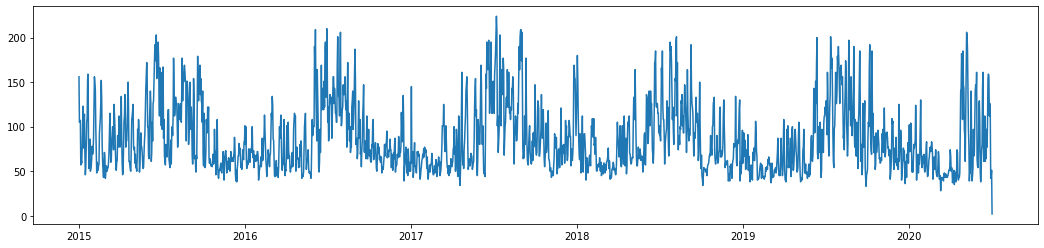

In [17]:
plt.figure(figsize=(18, 4))
plt.plot(lax_aqi['AQI'])

## Read out the data

In [18]:
lax_aqi.to_pickle('../datasets/air-quality-reports/aggregates/lax.pkl')